Ilustraremos la transformación de Box - Cox con un ejemplo en python:

In [18]:
# importar modulos
import os
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from scipy.stats import t, zscore
import random

Simularemos una distribución asimétrica a la izquierda:

In [19]:
# Generar una distribución asimétrica (una exponencial en particular)
np.random.seed(0)
x = np.random.exponential(size = 1000)
np.mean(x), np.var(x)

(1.003540208760709, 1.0590341339276639)

In [20]:
# Transformación de Box-Cox (Dupla: arreglo de valores transformados y lambda)
y, fitted_lambda = stats.boxcox(x)

Se compara la distribución original con la transformada mediante Box - Cox

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


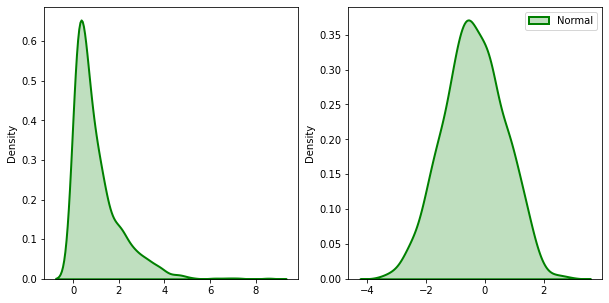

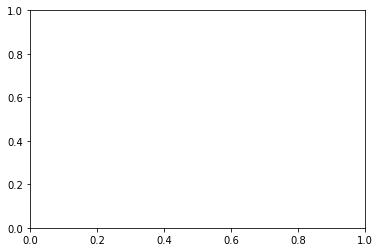

In [23]:
# crear ejes para el gráfico: 1 fila 2 columnas
fig, ax = plt.subplots(1, 2)
# graficando la variable en su manera original y luego de transformada
sns.distplot(x, hist = False, kde = True,
kde_kws = {'shade': True, 'linewidth': 2},
label = "Non-Normal", color ="green", ax = ax[0])
sns.distplot(y, hist = False, kde = True,
kde_kws = {'shade': True, 'linewidth': 2},
label = "Normal", color ="green", ax = ax[1])
# Anadiendo leyenda a los gráficos
plt.legend(loc = "upper right")
# re-escalando los subplots
fig.set_figheight(5)
fig.set_figwidth(10)
plt.show()
# Se restituyen los valores a 1 fila 1 columna para los plots
fig, ax = plt.subplots(1, 1)

In [24]:
print(f"Lambda utilizado para la transformación: {fitted_lambda}")

Lambda utilizado para la transformación: 0.2420131978174143


Ejercicio: se ilustra la identificación de atípicos con la base de datos iris. Se utiliza para la demostración
la variable Sepal.Length. Dada la aparentemente normalidad de los datos se detectarán directamente los
outliers mediante la regla de Tukey.
Python no tiene una función para su cálculo, así que se crea la función fivenum para que genere calcule
y entregue los cinco números de Tukey: bigote inferior, primer cuartil, mediana, tercer cuartil y bigote
superior, para una lista, arreglo univariado de numpy o serie de pandas.

In [16]:
def fivenum(x, range = 1.5, nan_remove = True):
  """Devuelve los cinco números de Tukey (mínimo, bigote inferior, mediana,
  bigote superior, maximo) para una lista, arreglo univariado de numpy o serie de pandas"""

  if(isinstance(x, list)):
        x = np.array(x)
  try:
        np.sum(x)
  except TypeError :
        print('Error: debe proveer una lista o un arreglo de sólo números')
  if (nan_remove == True):
        y = x[~np.isnan(x)]
        q1 = np.percentile(y, 25)
        q3 = np.percentile(y,75)
        md = np.median(y)
        RI = q3-q1
        lower_whisker = q1 - 1.5 * RI
        upper_whisker = q3 + 1.5 * RI
        lower_whisker = np.max([lower_whisker, np.min(y)])
        upper_whisker = np.min([upper_whisker, np.max(y)])

  else:
        q1 = np.percentile(x, 25)
        q3 = np.percentile(x,75)
        md = np.median(x)
        RI = q3-q1
        lower_whisker = q1 - 1.5 * RI
        upper_whisker = q3 + 1.5 * RI
        lower_whisker = np.max([lower_whisker, np.min(x)])
        upper_whisker = np.min([upper_whisker, np.max(x)])

  salida = np.array([lower_whisker, q1, md, q3, upper_whisker])
  return [salida]

Se cargan los datos para el ejemplo:

In [25]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris['target']
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length',
'petal_width', 'species']

Se calculan los 5 números de Tukey y se guardan en la variable fnums:

In [63]:
fnums = fivenum(iris_df.sepal_width)
fnums

[array([2.05, 2.8 , 3.  , 3.3 , 4.05])]

In [64]:
iris_df['outlier_sw'] = iris_df['sepal_width'].apply(lambda x: 'outlier' if (x < fnums[0][0]) | (x > fnums[0][4]) else 'no_outlier')
iris_df.outlier_sw.value_counts()

no_outlier    146
outlier         4
Name: outlier_sw, dtype: int64

Ejemplo de una variable sesgada.

Detectar los outliers de la variable Income de base de datos de empresas Lucy.

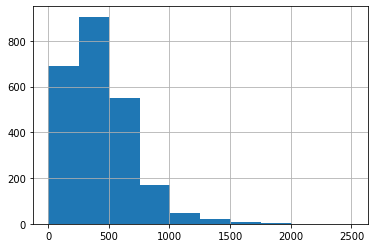

In [66]:
Lucy = pd.read_csv("Lucy.csv")
Lucy.Income.hist()
plt.show()

Se evidencia que la distribución del ingreso es muy asimétrica a la derecha, por lo tanto se aplica la transformación de Box-Cox y se almacena en la variable Income_bc:

In [67]:
# (Dupla: arreglo de valores transformados y lambda)
y_income_bc, fitted_lambda_income = stats.boxcox(Lucy.Income)
Lucy['Income_bc'] = y_income_bc
Lucy.head()

,ID,Ubication,Level,Zone,Income,Employees,Taxes,SPAM,Income_bc
0,AB001,c1k1,Small,A,281,41,3.0,no,18.293605
1,AB002,c1k2,Small,A,329,19,4.0,yes,19.521134
2,AB003,c1k3,Small,A,405,68,7.0,no,21.248675
3,AB004,c1k4,Small,A,360,89,5.0,no,20.253834
4,AB005,c1k5,Small,A,391,91,7.0,yes,20.947118


El valor de lambda considerado por parte de la función stats.boxcox es:

In [68]:
fitted_lambda_income

0.3589008867008163

Se guardan los cinco números de Tukey en la variable fn_income_bc:

In [69]:
fn_income_bc = fivenum(Lucy.Income_bc)
fn_income_bc

[array([ 5.34786971, 16.8315778 , 20.92531509, 24.48738319, 35.97109128])]

Se crea una nueva variable denominada outlier_Income donde se almacena si es un outlier. Se imprime el
conteo.

In [73]:
Lucy['outlier_Income'] = Lucy['Income_bc'].apply(lambda x: 'outlier' if (x < fn_income_bc[0][0]) | (x > fn_income_bc[0][4]) else 'no_outlier')
Lucy.outlier_Income.value_counts()

no_outlier    2379
outlier         17
Name: outlier_Income, dtype: int64